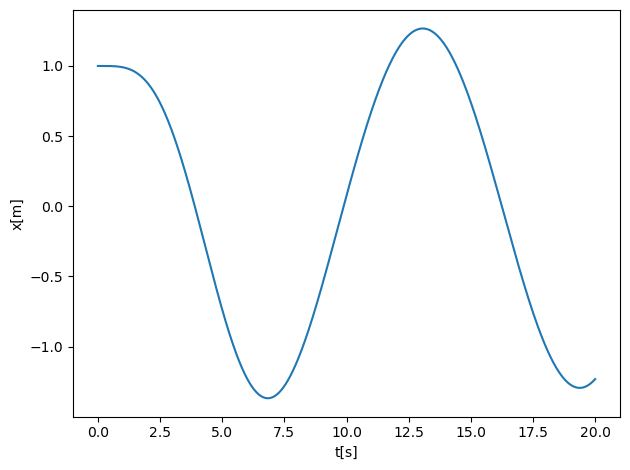

In [3]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

# if not os.path.exists(PROJECT_ROOT_DIR):
#     os.mkdir(PROJECT_ROOT_DIR)

# if not os.path.exists(FIGURE_ID):
#     os.makedirs(FIGURE_ID)

# if not os.path.exists(DATA_ID):
#     os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


def SpringForce(v,x,t):
#   note here that we have divided by mass and we return the acceleration
    return  -2*gamma*v-x+Ftilde*cos(t*Omegatilde)


def RK4(v,x,t,n,Force):
    for i in range(n-1):
# Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT*Force(v[i],x[i],t[i])
# Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT*Force(vv,xx,t[i]+DeltaT)
# Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.
        t[i+1] = t[i] + DeltaT


# Main part begins here

DeltaT = 0.001
#set up arrays 
tfinal = 20 # in dimensionless time
n = ceil(tfinal/DeltaT)
# set up arrays for t, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions (can change to more than one dim)
x0 =  1.0 
v0 = 0.0
x[0] = x0
v[0] = v0
gamma = 0.2
Omegatilde = 0.5
Ftilde = 1.0
# Start integrating using Euler's method
# Note that we define the force function as a SpringForce
RK4(v,x,t,n,SpringForce)

# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x[m]')
ax.set_xlabel('t[s]')
ax.plot(t, x)
fig.tight_layout()
# save_fig("ForcedBlockRK4")
plt.show()